# Gradient Descent


In [1]:
import numpy as np
import sympy as sp
from sympy.parsing.latex import parse_latex

import matplotlib.pyplot as plt

from IPython.display import display, Markdown

In [2]:
!pip install antlr4-python3-runtime

Defaulting to user installation because normal site-packages is not writeable


In [3]:
class GradientDescent:
    def __init__(self, func: callable, initial_guess: np.ndarray, alpha: float = 0.01, tolerance: float = 0.000001, max_iterations: int = 100000, print_every: int = 100):
        self.func = func  # Note: Function should be in sympy format 
        self.initial_guess = initial_guess
        self.alpha = alpha
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.print_every = print_every

        self.no_of_unknowns = len(initial_guess)
        self.gradient_formula = self._initialize_gradient()

    def run(self) -> np.ndarray:
        x_k = self.initial_guess
        k = 0
        while True:
            temp = x_k - self.alpha * self._gradient(x_k)

            if k % self.print_every == 0:
                print(f'k = {k:3d} {self._format_x_k(x_k)} -- f(x_k) = {self.func(x_k):.8f}')

            if (self._check_tol_x_k(x_k, temp) and k < self.max_iterations):
                x_k = temp
            else:
                print(f'k = {k:3d} {self._format_x_k(x_k)} -- f(x_k) = {self.func(x_k):.8f}')
                if (k == self.max_iterations):
                    print(f"Max iterations reached ({k}).")
                else:
                    print(f"Tolerance reached at {k + 1} iterations.")
                break

            k += 1

        return x_k

    def _gradient(self, x: np.ndarray) -> np.ndarray:
        return np.array([func(*x) for func in self.gradient_formula])

    def _format_x_k(self, x_k: np.ndarray) -> str:
        s = ''
        for i in range(len(x_k)):
            s += f' -- x_k[{i}] = {x_k[i]:.8f}'

        return s

    def _check_tol_x_k(self, x_1: np.ndarray, x_2: np.ndarray) -> bool:
        for i in range(len(x_1)):
            if abs(x_1[i] - x_2[i]) > self.tolerance:
                return True
        return False

    def _initialize_gradient(self) -> np.ndarray:
        partial_derivatives_dict = {}
        x = sp.symbols(f'x:{self.no_of_unknowns}')
        func = self.func
        derivatives = self._get_partial_derivatives(func)
        print('𝑓\'(𝐱):')
        print(list(derivatives.values()))
        print('')

        partial_derivatives_dict = derivatives

        return np.array([sp.lambdify(x, derivative, 'numpy') for
                        derivative in list(partial_derivatives_dict.values())])

    def _get_partial_derivatives(self, func: callable) -> dict:
        x = sp.symbols(f'x:{self.no_of_unknowns}')
        expr = sp.sympify(func(x))

        derivatives = {}
        function_name = func.__name__

        for i, xi in enumerate(x):
            derivative = sp.diff(expr, xi)
            derivative_function_name = f'{function_name}_derivative_{i}'  # Dynamically generate function names
            derivatives[derivative_function_name] = derivative 

        return (derivatives)

In [18]:
class SympyFunctionPrinter:
    def __init__(self, func, variables):
        self.func = func
        self.variables = variables

    def display_markdown(self):
        if len(self.variables) == 1:
            var = sp.Symbol('x')
            expr = self.func([var])
            display(Markdown(f'$$f(x) = {sp.latex(expr)}$$'))
        else:
            expr = self.func(self.variables)
            var_str = ", ".join([str(v) for v in self.variables])
            display(Markdown(f'$$f({var_str}) = {sp.latex(expr)}$$'))

In [19]:
# 1-D
def f_1D(x):
    return - x[0] * sp.exp(-x[0]**2)

x = sp.symbols('x0')
SympyFunctionPrinter(f_1D, (x,)).display_markdown()

$$f(x) = - x e^{- x^{2}}$$

In [20]:

gd = GradientDescent(f_1D, [0.25], alpha=0.457106, print_every=1)
minimum = gd.run()

𝑓'(𝐱):
[2*x0**2*exp(-x0**2) - exp(-x0**2)]

k =   0  -- x_k[0] = 0.25000000 -- f(x_k) = -0.23485327
k =   1  -- x_k[0] = 0.62573493 -- f(x_k) = -0.42300443
k =   2  -- x_k[0] = 0.69276261 -- f(x_k) = -0.42870428
k =   3  -- x_k[0] = 0.70412274 -- f(x_k) = -0.42887429
k =   4  -- x_k[0] = 0.70646768 -- f(x_k) = -0.42888159
k =   5  -- x_k[0] = 0.70696907 -- f(x_k) = -0.42888193
k =   6  -- x_k[0] = 0.70707707 -- f(x_k) = -0.42888194
k =   7  -- x_k[0] = 0.70710037 -- f(x_k) = -0.42888194
k =   8  -- x_k[0] = 0.70710540 -- f(x_k) = -0.42888194
k =   9  -- x_k[0] = 0.70710648 -- f(x_k) = -0.42888194
k =   9  -- x_k[0] = 0.70710648 -- f(x_k) = -0.42888194
Tolerance reached at 10 iterations.


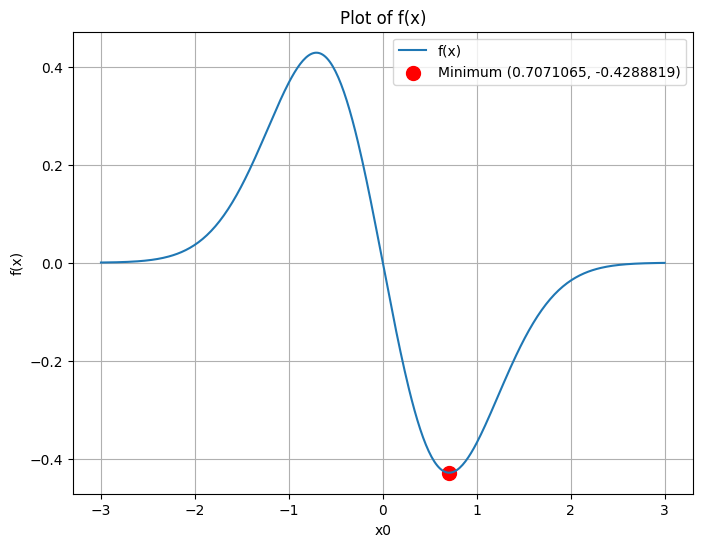

In [21]:
x = sp.symbols('x:1')
f_numeric = sp.lambdify(x, f_1D(x), 'numpy')

# Generate x0 values
x0_values = np.linspace(-3, 3, 400)

# Calculate the corresponding f(x0) values for each point
f_values = list([f_numeric(x0_val) for x0_val in x0_values])

# Find the minimum point
min_x0 = minimum[0]
min_f = f_numeric(min_x0)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x0_values, f_values, label='f(x)')
plt.scatter(min_x0, min_f, color='red', marker='o', s=100, label=f'Minimum ({min_x0:.7f}, {min_f:.7f})')
plt.xlabel('x0')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid()
plt.legend()
plt.show()

In [23]:
# 2 or more Dimensions
def f(x):
    return (x[0] - 3)**2 + (x[1] - 1)**2

x0, x1 = sp.symbols('x0 x1')
SympyFunctionPrinter(f, (x0, x1)).display_markdown()

$$f(x0, x1) = \left(x_{0} - 3\right)^{2} + \left(x_{1} - 1\right)^{2}$$

In [24]:
gd = GradientDescent(f,
                    initial_guess=np.array([0, 0]),
                    alpha=0.1,
                    tolerance=0.0000001,
                    print_every=10)
minimum = gd.run()

𝑓'(𝐱):
[2*x0 - 6, 2*x1 - 2]

k =   0  -- x_k[0] = 0.00000000 -- x_k[1] = 0.00000000 -- f(x_k) = 10.00000000
k =  10  -- x_k[0] = 2.67787745 -- x_k[1] = 0.89262582 -- f(x_k) = 0.11529215
k =  20  -- x_k[0] = 2.96541235 -- x_k[1] = 0.98847078 -- f(x_k) = 0.00132923
k =  30  -- x_k[0] = 2.99628618 -- x_k[1] = 0.99876206 -- f(x_k) = 0.00001532
k =  40  -- x_k[0] = 2.99960123 -- x_k[1] = 0.99986708 -- f(x_k) = 0.00000018
k =  50  -- x_k[0] = 2.99995718 -- x_k[1] = 0.99998573 -- f(x_k) = 0.00000000
k =  60  -- x_k[0] = 2.99999540 -- x_k[1] = 0.99999847 -- f(x_k) = 0.00000000
k =  70  -- x_k[0] = 2.99999951 -- x_k[1] = 0.99999984 -- f(x_k) = 0.00000000
k =  70  -- x_k[0] = 2.99999951 -- x_k[1] = 0.99999984 -- f(x_k) = 0.00000000
Tolerance reached at 71 iterations.


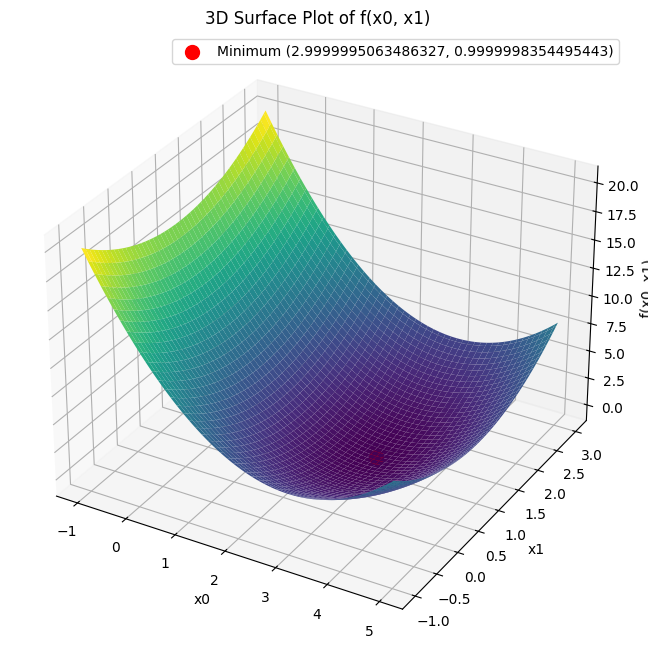

In [25]:
# Generate x0 and x1 values
x0 = np.linspace(-1, 5, 100)
x1 = np.linspace(-1, 3, 100)

# Create a grid of x0 and x1 values
X0, X1 = np.meshgrid(x0, x1)

# Calculate the corresponding f(x0, x1) values for each point in the grid
Z = f([X0, X1])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0, X1, Z, cmap='viridis')

# Set axis labels
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x0, x1)')
ax.set_title('3D Surface Plot of f(x0, x1)')

# Add minimum point
ax.scatter(minimum[0], minimum[1], [f(minimum)], color='red', marker='o', s=100, label=f'Minimum ({minimum[0]}, {minimum[1]})')

# Display legend
ax.legend()

plt.show()

## Root Finding

Let $G(x)$ be the quadratic minimization representation of our system:

$$
G(x) = \frac{1}{2} \sum_{i=1}^{m} [f_i(x)]^2
$$

Where:
- $x$ is the vector of variables.
- $m$ is the number of equations in the system.
- $f_i(x)$ represents each equation in the system.

<br>

**Gradient Descent Iteration:**
$$x_{k+1} = x_k - \alpha \nabla G(x)$$

Where:

$$
\nabla G(x) =
\begin{bmatrix}
f_1(x) \frac{\partial f_1}{\partial x_1} + f_2(x) \frac{\partial f_2}{\partial x_1} + \ldots + f_m(x) \frac{\partial f_m}{\partial x_1} \\
f_1(x) \frac{\partial f_1}{\partial x_2} + f_2(x) \frac{\partial f_2}{\partial x_2} + \ldots + f_m(x) \frac{\partial f_m}{\partial x_2} \\
\vdots \\
f_1(x) \frac{\partial f_1}{\partial x_n} + f_2(x) \frac{\partial f_2}{\partial x_n} + \ldots + f_m(x) \frac{\partial f_m}{\partial x_n}
\end{bmatrix}
$$

In [ ]:
def G(func_list, no_of_args=1):
    x = sp.symbols(f'x:{no_of_args}')
    return sp.lambdify([x], (sum([func(x)**2 for func in func_list]))/2, 'sympy')

In [ ]:
# 1-D
def f(x):
    return - x[0] * sp.exp(-x[0]**2)


gd = GradientDescent(G([f]), [0.25], alpha=0.457106, print_every=1)
root = gd.run()

𝑓'(𝐱):
[-2.0*x0**3*exp(-2*x0**2) + 1.0*x0*exp(-2*x0**2)]

k =   0  -- x_k[0] = 0.25000000 -- f(x_k) = 0.02757803
k =   1  -- x_k[0] = 0.16175742 -- f(x_k) = 0.01241571
k =   2  -- x_k[0] = 0.09525908 -- f(x_k) = 0.00445555
k =   3  -- x_k[0] = 0.05327475 -- f(x_k) = 0.00141107
k =   4  -- x_k[0] = 0.02919783 -- f(x_k) = 0.00042553
k =   5  -- x_k[0] = 0.01589678 -- f(x_k) = 0.00012629
k =   6  -- x_k[0] = 0.00863761 -- f(x_k) = 0.00003730
k =   7  -- x_k[0] = 0.00469049 -- f(x_k) = 0.00001100
k =   8  -- x_k[0] = 0.00254662 -- f(x_k) = 0.00000324
k =   9  -- x_k[0] = 0.00138258 -- f(x_k) = 0.00000096
k =  10  -- x_k[0] = 0.00075060 -- f(x_k) = 0.00000028
k =  11  -- x_k[0] = 0.00040750 -- f(x_k) = 0.00000008
k =  12  -- x_k[0] = 0.00022123 -- f(x_k) = 0.00000002
k =  13  -- x_k[0] = 0.00012010 -- f(x_k) = 0.00000001
k =  14  -- x_k[0] = 0.00006520 -- f(x_k) = 0.00000000
k =  15  -- x_k[0] = 0.00003540 -- f(x_k) = 0.00000000
k =  16  -- x_k[0] = 0.00001922 -- f(x_k) = 0.00000000
k =  17

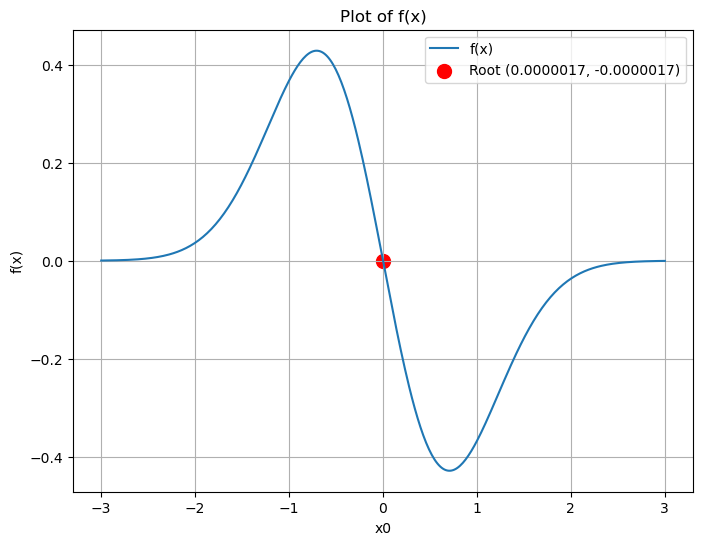

In [ ]:
x = sp.symbols('x:1')
f_numeric = sp.lambdify(x, f_1D(x), 'numpy')

# Generate x0 values
x0_values = np.linspace(-3, 3, 400)

# Calculate the corresponding f(x0) values for each point
f_values = list([f_numeric(x0_val) for x0_val in x0_values])

# Find the minimum point
min_x0 = root[0]
min_f = f_numeric(min_x0)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x0_values, f_values, label='f(x)')
plt.scatter(min_x0, min_f, color='red', marker='o', s=100, label=f'Root ({min_x0:.7f}, {min_f:.7f})')
plt.xlabel('x0')
plt.ylabel('f(x)')
plt.title('Plot of f(x)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
def f1(x):
    return 4*x[0]*x[1] - x[0]


def f2(x):
    return x[0]*x[1] + x[1]**2 - 1


gd = GradientDescent(G([f1, f2], 2), initial_guess=np.array([3, 1]), alpha=0.005, tolerance=0.0000001, print_every=10000)
minimum = gd.run()

𝑓'(𝐱):
[1.0*x1*(x0*x1 + x1**2 - 1) + 0.5*(8*x1 - 2)*(4*x0*x1 - x0), 4.0*x0*(4*x0*x1 - x0) + 0.5*(2*x0 + 4*x1)*(x0*x1 + x1**2 - 1)]

k =   0  -- x_k[0] = 3.00000000 -- x_k[1] = 1.00000000 -- f(x_k) = 45.00000000
k = 10000  -- x_k[0] = 3.69942723 -- x_k[1] = 0.25022447 -- f(x_k) = 0.00007397
k = 20000  -- x_k[0] = 3.74719718 -- x_k[1] = 0.25001227 -- f(x_k) = 0.00000023
k = 27234  -- x_k[0] = 3.74965432 -- x_k[1] = 0.25000151 -- f(x_k) = 0.00000000
Tolerance reached at 27235 iterations.
